<a href="https://colab.research.google.com/github/Hieudo02/FinalExamAI/blob/main/finalExam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PEOPLE COUNTING

In [ ]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array

target_width = 50
target_height = 100
folder = '/content/drive/MyDrive/Colab Notebooks/finalExam_Image/Human_NonHuman/'
photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('Human'):
    output = 1.0
  else:
    output = 0.0

  img = load_img(folder + file, target_size = (target_width, target_height))
  photo = img_to_array(img)
  photos.append(photo)
  labels.append(output)

photos= asarray(photos)
labels= asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/Colab Notebooks/finalExam_Image_npy/people_photos.npy', photos)
save('/content/drive/MyDrive/Colab Notebooks/finalExam_Image_npy/people_labels.npy', labels)

(2020, 50, 100, 3) (2020,)


In [ ]:
# Split data into train & test (8-2)
split_index = int(0.2 * len(photos))
test_photos, test_labels = photos[:split_index], labels[:split_index]
train_photos, train_labels = photos[split_index:], labels[split_index:]

print(test_photos.shape, train_photos.shape)

(404, 50, 100, 3) (1616, 50, 100, 3)


In [ ]:
train_photos = train_photos.reshape((1616, target_width, target_height, 3))
train_photos = train_photos.astype('float32')/255

test_photos = test_photos.reshape((404, target_width, target_height, 3))
test_photos = test_photos.astype('float32')/255

In [ ]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels, 2)
test_labels = to_categorical(test_labels, 2)

In [ ]:
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization,Input
from keras.optimizers import Adam
from keras import losses
loss = losses
batch_size = 30
epochs = 5
classes = 2

In [ ]:
from keras.layers import LeakyReLU
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear', input_shape = (target_width, target_height, 3), padding= 'same'))
model.add(LeakyReLU(alpha = 0.1))
# #Add Dropout
# model.add(Dropout(0.25))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
# #Add Dropout
# model.add(Dropout(0.25))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
# #Add Dropout
# model.add(Dropout(0.25))

In [ ]:
#Đưa vào ANN, bộ ANN để phân loại:
from keras.losses import categorical_crossentropy
model.add(Flatten())
model.add(Dense(1024, activation = 'linear'))

model.add(Dense(classes, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 50, 100, 32)       896       
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 50, 100, 32)       0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 25, 50, 64)        18496     
                                                                 
 conv2d_6 (Conv2D)           (None, 25, 50, 64)        36928     
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 25, 50, 64)        0         
                                                      

In [ ]:
#Compile:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
train = model.fit(train_photos, train_labels, batch_size= batch_size, epochs= epochs, verbose= 1)

Epoch 1/5
54/54 [==============================] - 88s 2s/step - loss: 1.0444 - accuracy: 0.6881
Epoch 2/5
54/54 [==============================] - 79s 1s/step - loss: 0.2759 - accuracy: 0.8942
Epoch 3/5
54/54 [==============================] - 78s 1s/step - loss: 0.2033 - accuracy: 0.9140
Epoch 4/5
54/54 [==============================] - 79s 1s/step - loss: 0.1278 - accuracy: 0.9554
Epoch 5/5
54/54 [==============================] - 80s 1s/step - loss: 0.1417 - accuracy: 0.9431


In [ ]:
# Evaluate model
test_loss, test_acc = model.evaluate(test_photos, test_labels)
print('Test accuracy:', test_acc)

10/13 [======================>.......] - ETA: 1s - loss: 0.4624 - accuracy: 0.8375

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/finalExam_model/HumanDetectionModel.h5')

1/1 [==============================] - 0s 26ms/step
Human


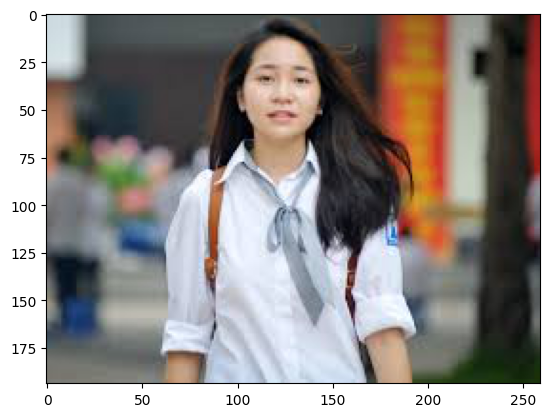

1/1 [==============================] - 0s 62ms/step
Human


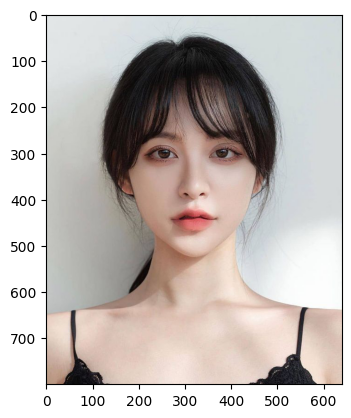

1/1 [==============================] - 0s 39ms/step
Human


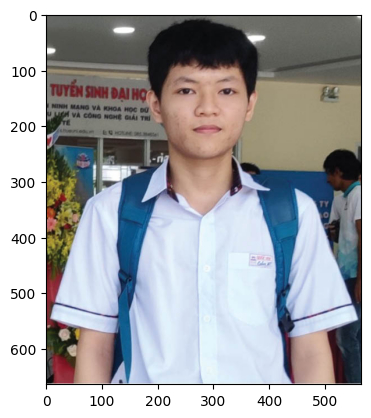

1/1 [==============================] - 0s 46ms/step
Not Human


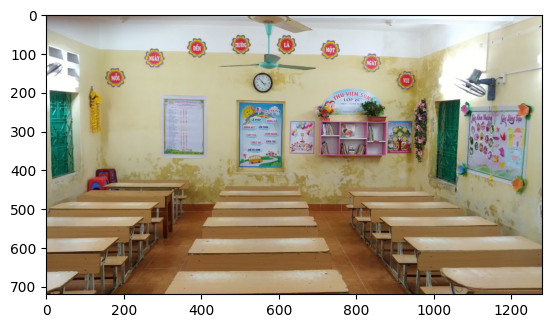

1/1 [==============================] - 0s 47ms/step
Not Human


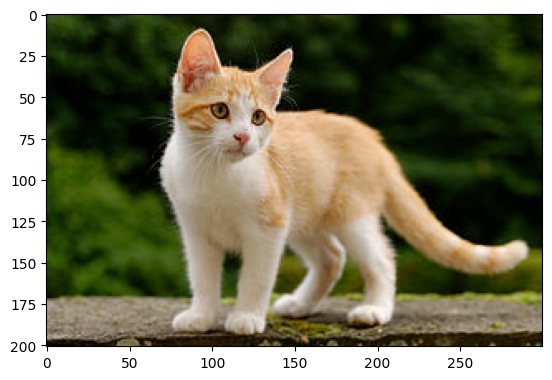

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from keras.utils import load_img
from keras.utils.image_utils import img_to_array

path = '/content/drive/MyDrive/Colab Notebooks/common_Image/singlePerson/'

for file in listdir(path):
  photo = load_img(path  +  file)
  plt.imshow(photo)

  photo = load_img(path + file, target_size = (50, 100))
  photo = img_to_array(photo)
  photo = photo.astype('float32')
  photo = photo/255
  photo = np.expand_dims(photo,axis=0)

  result=(model.predict(photo).argmax())
  class_name=['Not Human','Human']
  print(class_name[result])
  plt.show()